# Forest Cover Type Prediction

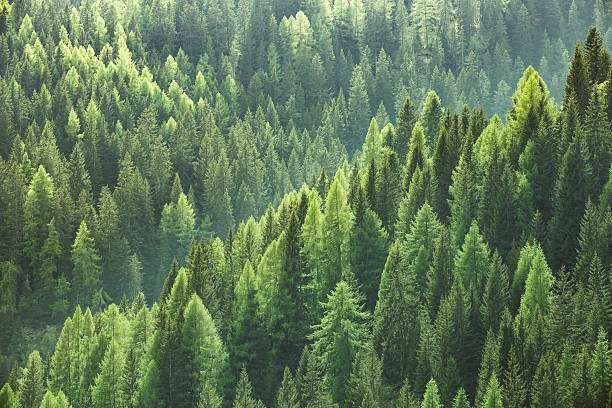
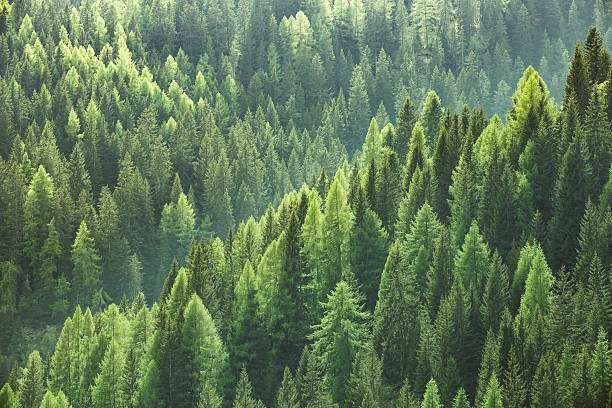

## 📌 Aim

The objective of this project is to predict the **Cover Type** of a forested area based on various **geographical, topographical, and soil-related features**.  
The dataset contains **cartographic data** collected from **US Geological Survey (USGS) and US Forest Service (USFS)**.

The **Cover_Type** variable represents **seven different forest types**:
1️⃣ **Spruce/Fir**  
2️⃣ **Lodgepole Pine**  
3️⃣ **Ponderosa Pine**  
4️⃣ **Cottonwood/Willow**  
5️⃣ **Aspen**  
6️⃣ **Douglas-fir**  
7️⃣ **Krummholz**  

The goal is to develop a **machine learning model** to classify the forest cover type using environmental and geological data.

## 📖 Introduction

Forests are vital ecosystems that contribute to biodiversity, climate regulation, and environmental sustainability.  
Accurate classification of **forest cover types** is essential for **forest management, conservation, and ecological studies**.  

This dataset includes various **environmental factors**, such as:
- **Elevation & Slope** – Helps understand terrain variations.
- **Distance to Water & Roadways** – Important for accessibility and moisture levels.
- **Soil Type & Wilderness Areas** – Key indicators of vegetation patterns.
- **Hillshade (Sunlight Exposure)** – Affects plant growth and forest structure.

### 🔍 **Why is this important?**
✔️ Helps in **forest conservation planning**.  
✔️ Supports **wildlife habitat studies**.  
✔️ Can be used for **wildfire risk assessment**.  

In this notebook, we will:
✅ Explore the dataset  
✅ Perform data preprocessing and feature engineering  
✅ Train and evaluate machine learning models  
✅ Predict **Cover Type** using real-world data  

## Requirements

In [2]:
import pandas as pd
pd.set_option('display.max_columns',100)
import warnings
warnings.filterwarnings('ignore')
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

from sklearn.model_selection import train_test_split
from sklearn.naive_bayes import GaussianNB
from sklearn.naive_bayes import BernoulliNB 
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score,confusion_matrix,classification_report

import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense
from sklearn.preprocessing import normalize, scale
from sklearn.preprocessing import LabelEncoder
from sklearn.metrics import accuracy_score

## Import Data

In [148]:
df=pd.read_csv('/kaggle/input/forest-cover-type-prediction/train.csv')

## EDA (Exploratory Data Analysis)

In [4]:
df.head()

Id  Elevation  Aspect  Slope  Horizontal_Distance_To_Hydrology  \
0   1       2596      51      3                               258   
1   2       2590      56      2                               212   
2   3       2804     139      9                               268   
3   4       2785     155     18                               242   
4   5       2595      45      2                               153   

   Vertical_Distance_To_Hydrology  Horizontal_Distance_To_Roadways  \
0                               0                              510   
1                              -6                              390   
2                              65                             3180   
3                             118                             3090   
4                              -1                              391   

   Hillshade_9am  Hillshade_Noon  Hillshade_3pm  \
0            221             232            148   
1            220             235            151   
2            234             238            135   
3            238             238            122   
4            220             234            150   

   Horizontal_Distance_To_Fire_Points  Wilderness_Area1  Wilderness_Area2  \
0                                6279                 1                 0   
1                                6225                 1                 0   
2                                6121                 1                 0   
3                                6211                 1                 0   
4                                6172                 1                 0   

   Wilderness_Area3  Wilderness_Area4  Soil_Type1  Soil_Type2  Soil_Type3  \
0                 0                 0           0           0           0   
1                 0                 0           0           0           0   
2                 0                 0           0           0           0   
3                 0                 0           0           0           0   
4                 0                 0           0           0           0   

   Soil_Type4  Soil_Type5  Soil_Type6  Soil_Type7  Soil_Type8  Soil_Type9  \
0           0           0           0           0           0           0   
1           0           0           0           0           0           0   
2           0           0           0           0           0           0   
3           0           0           0           0           0           0   
4           0           0           0           0           0           0   

   Soil_Type10  Soil_Type11  Soil_Type12  Soil_Type13  Soil_Type14  \
0            0            0            0            0            0   
1            0            0            0            0            0   
2            0            0            1            0            0   
3            0            0            0            0            0   
4            0            0            0            0            0   

   Soil_Type15  Soil_Type16  Soil_Type17  Soil_Type18  Soil_Type19  \
0            0            0            0            0            0   
1            0            0            0            0            0   
2            0            0            0            0            0   
3            0            0            0            0            0   
4            0            0            0            0            0   

   Soil_Type20  Soil_Type21  Soil_Type22  Soil_Type23  Soil_Type24  \
0            0            0            0            0            0   
1            0            0            0            0            0   
2            0            0            0            0            0   
3            0            0            0            0            0   
4            0            0            0            0            0   

   Soil_Type25  Soil_Type26  Soil_Type27  Soil_Type28  Soil_Type29  \
0            0            0            0            0            1   
1            0            0            0            0            1  

In [5]:
df.isnull().sum()

Id                                    0
Elevation                             0
Aspect                                0
Slope                                 0
Horizontal_Distance_To_Hydrology      0
Vertical_Distance_To_Hydrology        0
Horizontal_Distance_To_Roadways       0
Hillshade_9am                         0
Hillshade_Noon                        0
Hillshade_3pm                         0
Horizontal_Distance_To_Fire_Points    0
Wilderness_Area1                      0
Wilderness_Area2                      0
Wilderness_Area3                      0
Wilderness_Area4                      0
Soil_Type1                            0
Soil_Type2                            0
Soil_Type3                            0
Soil_Type4                            0
Soil_Type5                            0
Soil_Type6                            0
Soil_Type7                            0
Soil_Type8                            0
Soil_Type9                            0
Soil_Type10                           0


In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 15120 entries, 0 to 15119
Data columns (total 56 columns):
 #   Column                              Non-Null Count  Dtype
---  ------                              --------------  -----
 0   Id                                  15120 non-null  int64
 1   Elevation                           15120 non-null  int64
 2   Aspect                              15120 non-null  int64
 3   Slope                               15120 non-null  int64
 4   Horizontal_Distance_To_Hydrology    15120 non-null  int64
 5   Vertical_Distance_To_Hydrology      15120 non-null  int64
 6   Horizontal_Distance_To_Roadways     15120 non-null  int64
 7   Hillshade_9am                       15120 non-null  int64
 8   Hillshade_Noon                      15120 non-null  int64
 9   Hillshade_3pm                       15120 non-null  int64
 10  Horizontal_Distance_To_Fire_Points  15120 non-null  int64
 11  Wilderness_Area1                    15120 non-null  int64
 12  Wild

In [7]:
df.shape

(15120, 56)

In [8]:
df.describe().T

count         mean          std     min  \
Id                                  15120.0  7560.500000  4364.912370     1.0   
Elevation                           15120.0  2749.322553   417.678187  1863.0   
Aspect                              15120.0   156.676653   110.085801     0.0   
Slope                               15120.0    16.501587     8.453927     0.0   
Horizontal_Distance_To_Hydrology    15120.0   227.195701   210.075296     0.0   
Vertical_Distance_To_Hydrology      15120.0    51.076521    61.239406  -146.0   
Horizontal_Distance_To_Roadways     15120.0  1714.023214  1325.066358     0.0   
Hillshade_9am                       15120.0   212.704299    30.561287     0.0   
Hillshade_Noon                      15120.0   218.965608    22.801966    99.0   
Hillshade_3pm                       15120.0   135.091997    45.895189     0.0   
Horizontal_Distance_To_Fire_Points  15120.0  1511.147288  1099.936493     0.0   
Wilderness_Area1                    15120.0     0.237897     0.425810     0.0   
Wilderness_Area2                    15120.0     0.033003     0.178649     0.0   
Wilderness_Area3                    15120.0     0.419907     0.493560     0.0   
Wilderness_Area4                    15120.0     0.309193     0.462176     0.0   
Soil_Type1                          15120.0     0.023479     0.151424     0.0   
Soil_Type2                          15120.0     0.041204     0.198768     0.0   
Soil_Type3                          15120.0     0.063624     0.244091     0.0   
Soil_Type4                          15120.0     0.055754     0.229454     0.0   
Soil_Type5                          15120.0     0.010913     0.103896     0.0   
Soil_Type6                          15120.0     0.042989     0.202840     0.0   
Soil_Type7                          15120.0     0.000000     0.000000     0.0   
Soil_Type8                          15120.0     0.000066     0.008133     0.0   
Soil_Type9                          15120.0     0.000661     0.025710     0.0   
Soil_Type10                         15120.0     0.141667     0.348719     0.0   
Soil_Type11                         15120.0     0.026852     0.161656     0.0   
Soil_Type12                         15120.0     0.015013     0.121609     0.0   
Soil_Type13                         15120.0     0.031481     0.174621     0.0   
Soil_Type14                         15120.0     0.011177     0.105133     0.0   
Soil_Type15                         15120.0     0.000000     0.000000     0.0   
Soil_Type16                         15120.0     0.007540     0.086506     0.0   
Soil_Type17                         15120.0     0.040476     0.197080     0.0   
Soil_Type18                         15120.0     0.003968     0.062871     0.0   
Soil_Type19                         15120.0     0.003042     0.055075     0.0   
Soil_Type20                         15120.0     0.009193     0.095442     0.0   
Soil_Type21                         15120.0     0.001058     0.032514     0.0   
Soil_Type22                         15120.0     0.022817     0.149326     0.0   
Soil_Type23                         15120.0     0.050066     0.218089     0.0   
Soil_Type24                         15120.0     0.016997     0.129265     0.0   
Soil_Type25                         15120.0     0.000066     0.008133     0.0   
Soil_Type26                         15120.0     0.003571     0.059657     0.0   
Soil_Type27                         15120.0     0.000992     0.031482     0.0   
Soil_Type28                         15120.0     0.000595     0.024391     0.0   
Soil_Type29                         15120.0     0.085384     0.279461     0.0   
Soil_Type30                         15120.0     0.047950     0.213667     0.0   
Soil_Type31                         15120.0     0.021958     0.146550     0.0   
Soil_Type32                         15120.0     0.045635     0.208699     0.0   
Soil_Type33                         15120.0     0.040741     0.197696     0.0   
Soil_Type34                         15120.0     0.001455     0.038118

In [9]:
df["Cover_Type"].unique()

array([5, 2, 1, 7, 3, 6, 4])

## Data Visualization

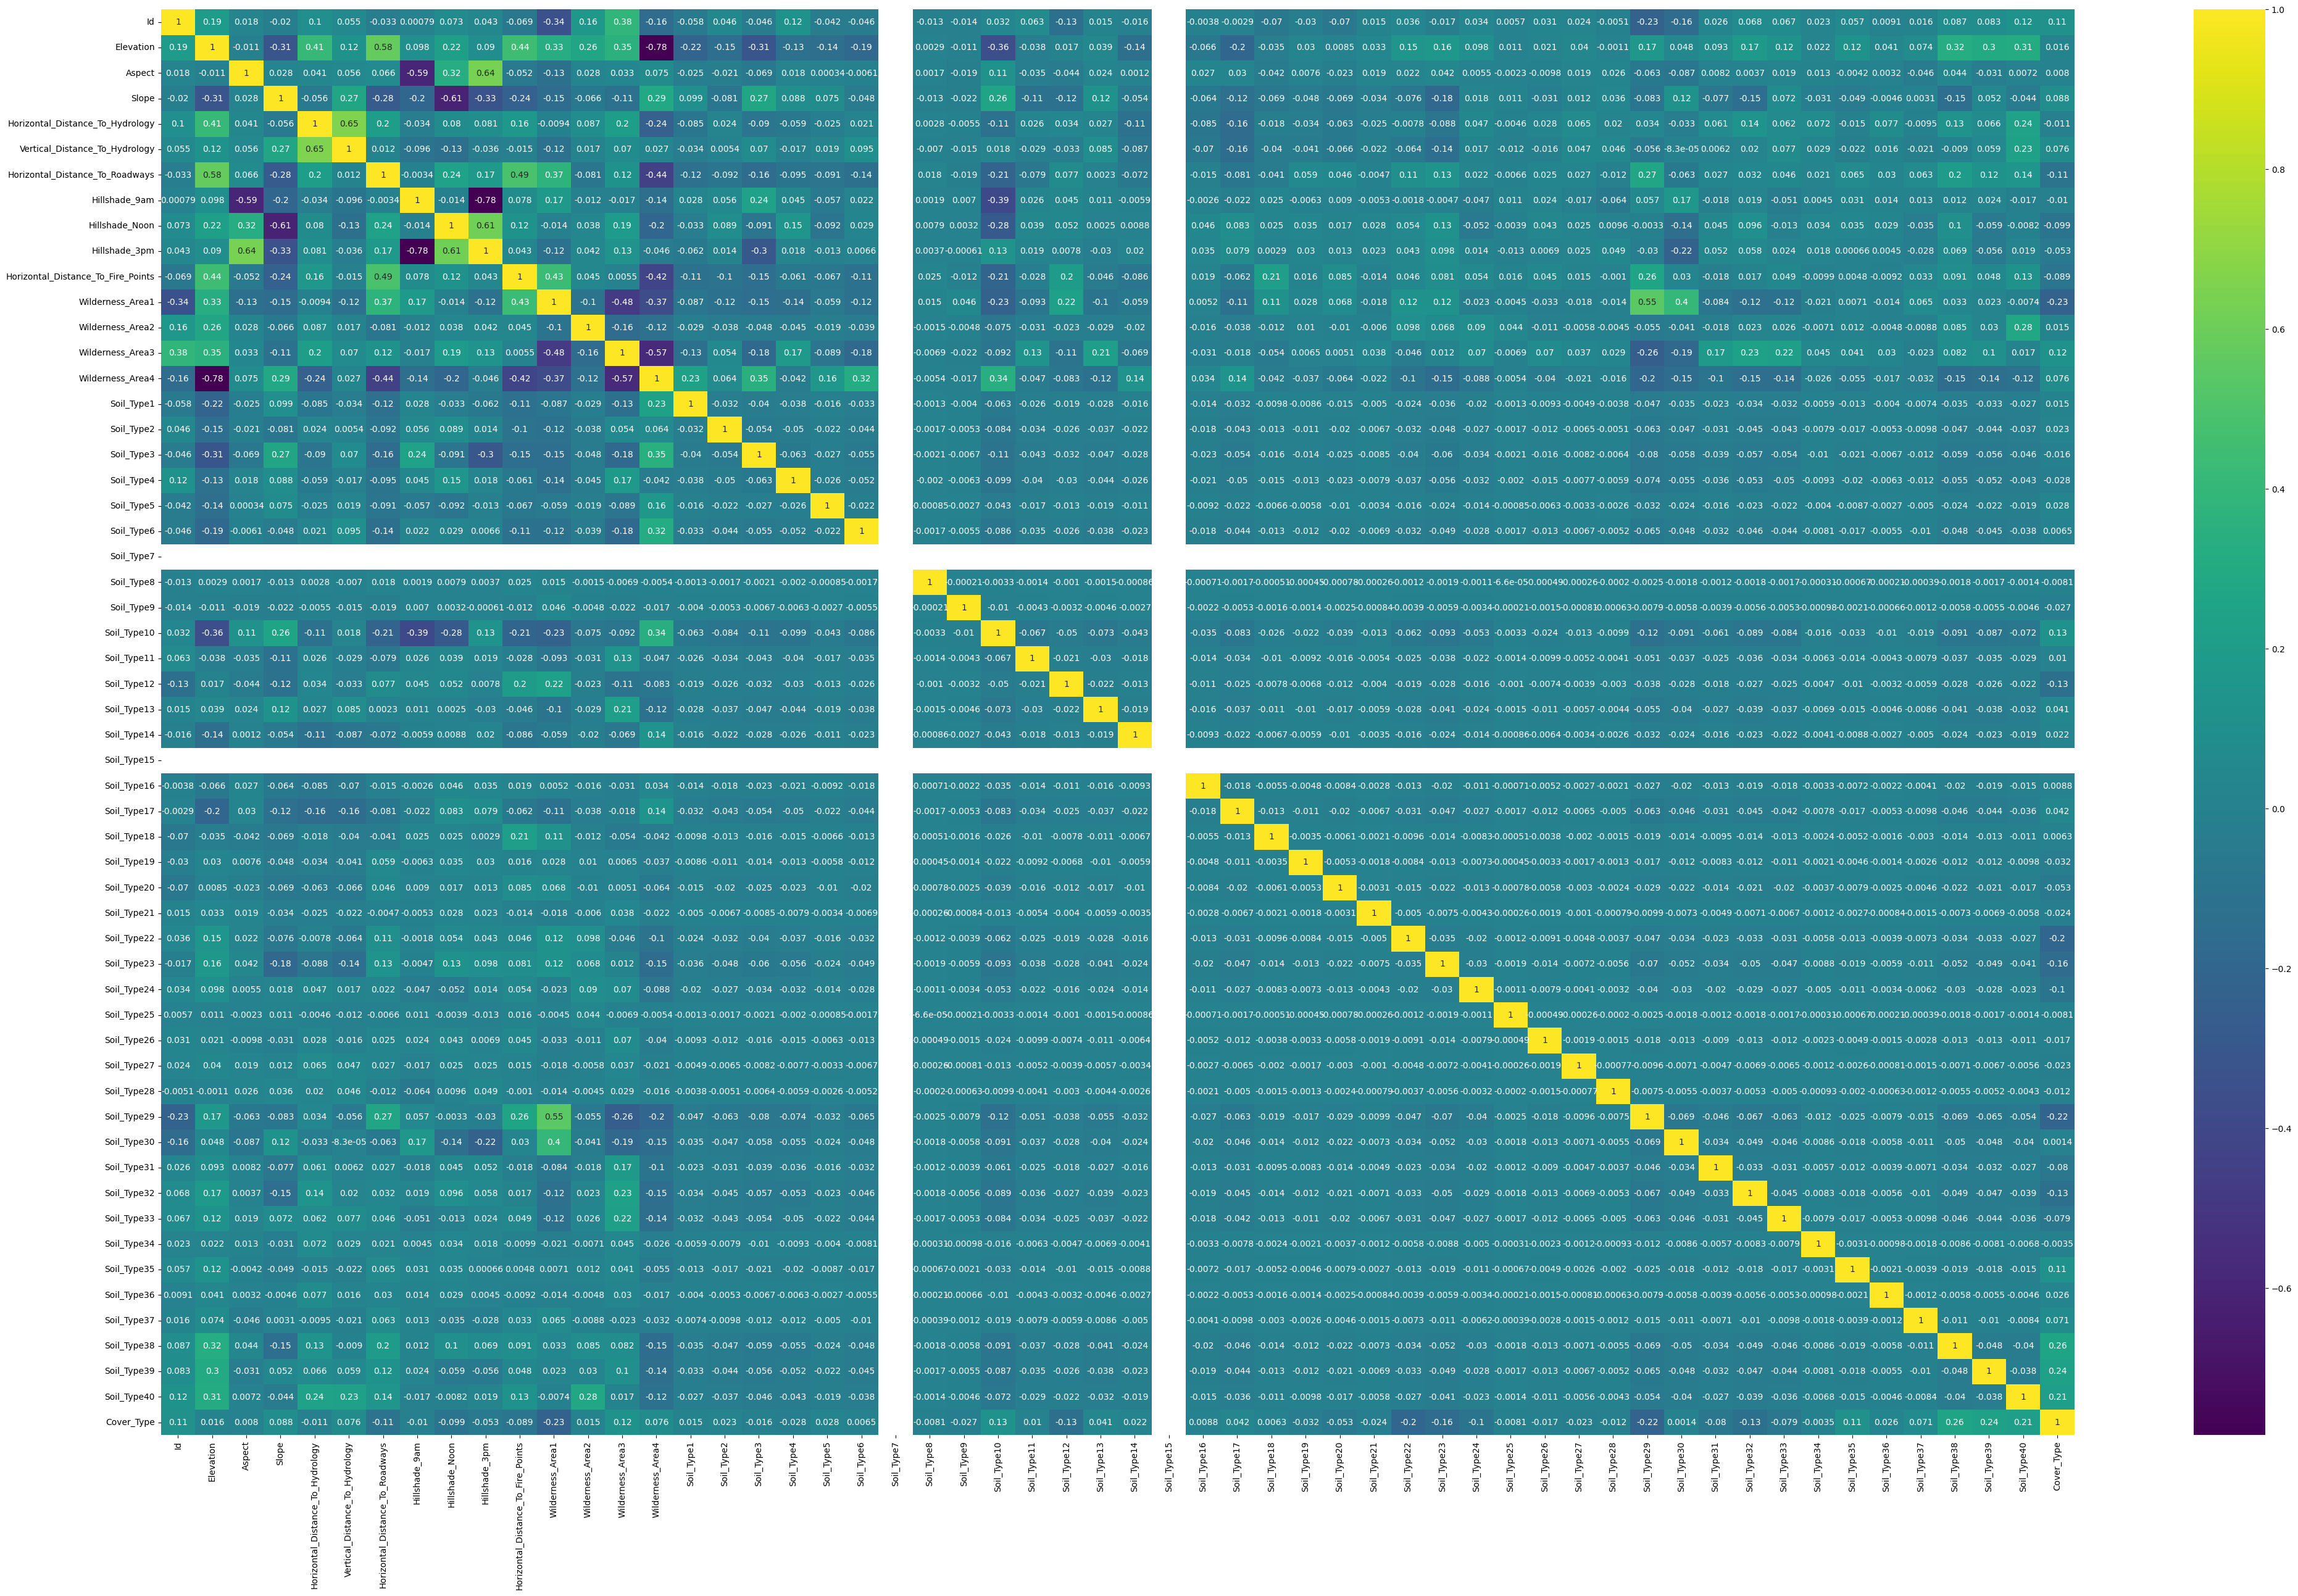

In [99]:
plt.figure(figsize=(50,30))
sns.heatmap(df.corr(numeric_only=True),annot=True,cmap='viridis');

<Axes: xlabel='Horizontal_Distance_To_Fire_Points'>

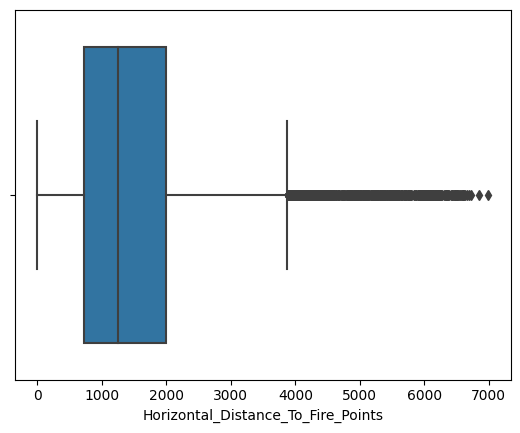

In [107]:
sns.boxplot(x=df['Horizontal_Distance_To_Fire_Points'])

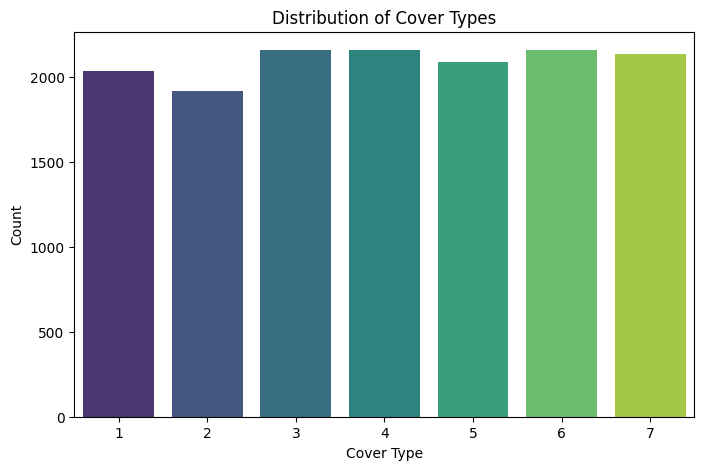

In [216]:
plt.figure(figsize=(8,5))
sns.countplot(x=df['Cover_Type'], palette='viridis')
plt.xlabel("Cover Type")
plt.ylabel("Count")
plt.title("Distribution of Cover Types")
plt.show()

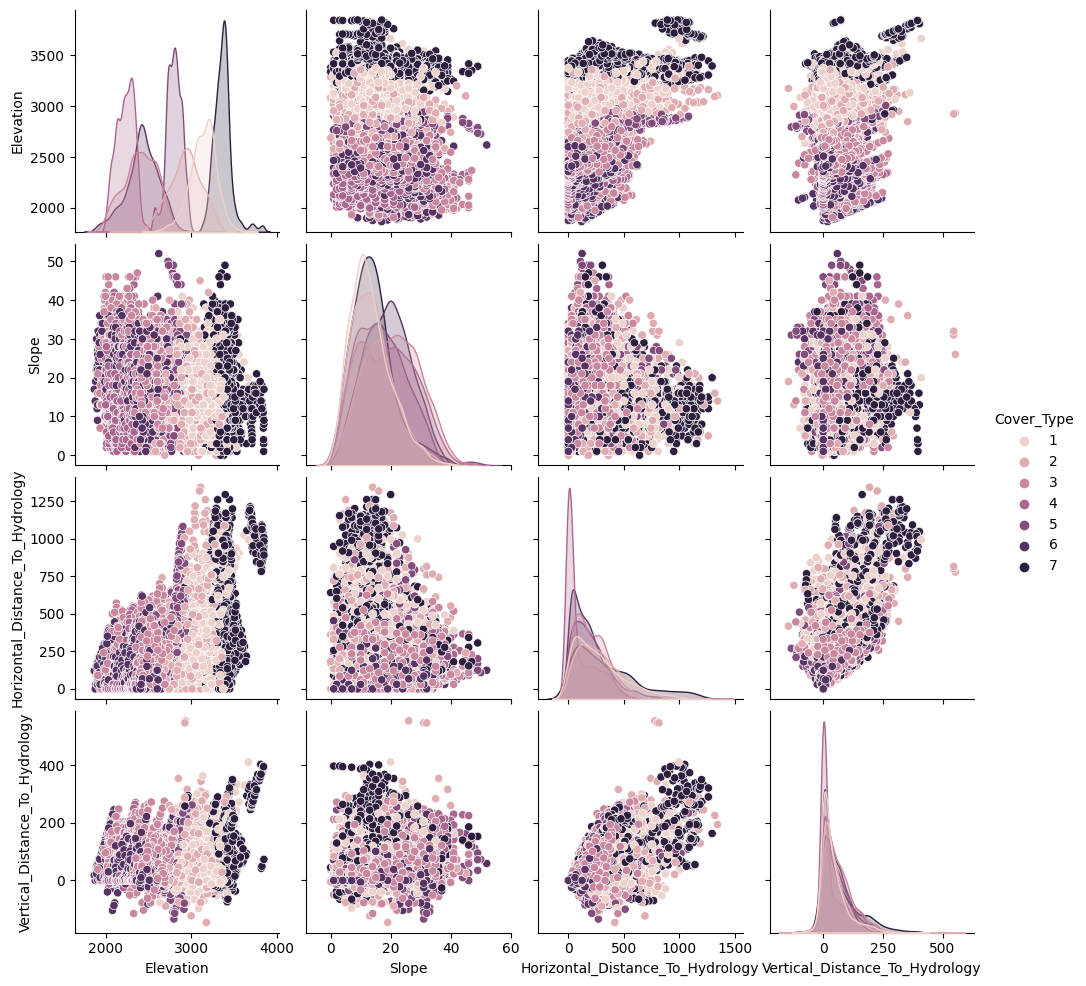

In [217]:
sns.pairplot(df, hue="Cover_Type", vars=['Elevation', 'Slope', 'Horizontal_Distance_To_Hydrology', 'Vertical_Distance_To_Hydrology'])

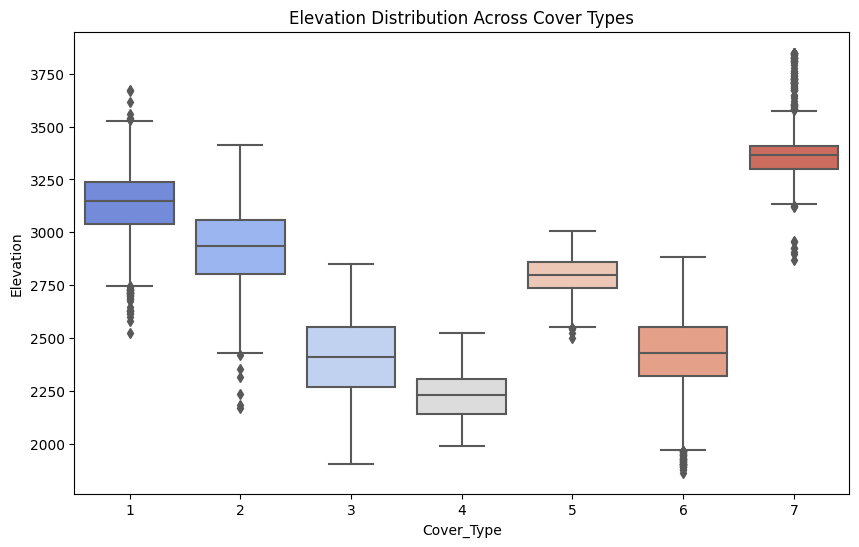

In [219]:
plt.figure(figsize=(10,6))
sns.boxplot(x='Cover_Type', y='Elevation', data=df, palette="coolwarm")
plt.title("Elevation Distribution Across Cover Types");

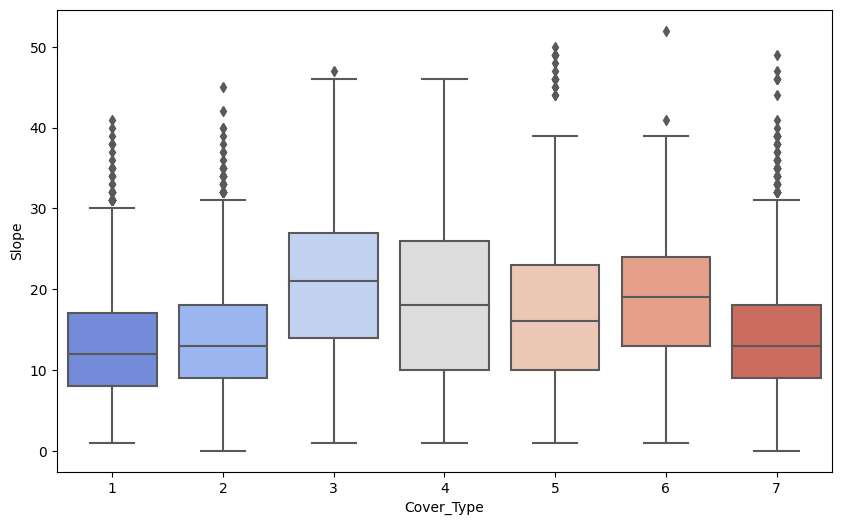

In [221]:
plt.figure(figsize=(10,6))
sns.boxplot(x='Cover_Type', y='Slope', data=df, palette="coolwarm");

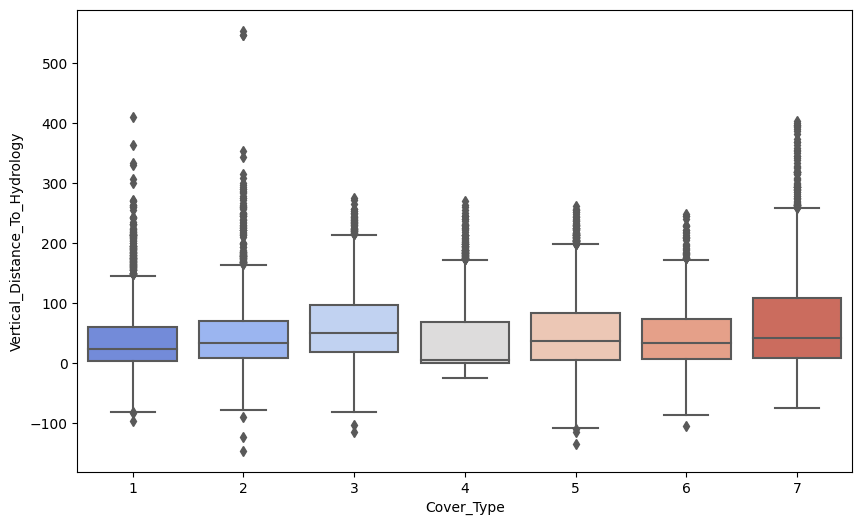

In [222]:
plt.figure(figsize=(10,6))
sns.boxplot(x='Cover_Type', y='Vertical_Distance_To_Hydrology', data=df, palette="coolwarm");

## Feature Engineering

### Outlier Analysis

In [182]:
upper_bound=df.quantile(q=.97,numeric_only=True)
lower_bound = df.quantile(q=.03,numeric_only=True)

In [183]:
df = df[(df['Horizontal_Distance_To_Fire_Points'] <= upper_bound['Horizontal_Distance_To_Fire_Points'])]

In [192]:
df.shape

(14666, 56)

In [193]:
abs(df.corr(numeric_only=True)['Cover_Type'].sort_values(ascending=False))

Cover_Type                            1.000000
Soil_Type38                           0.255571
Soil_Type39                           0.242184
Soil_Type40                           0.205463
Soil_Type10                           0.121834
Soil_Type35                           0.114613
Wilderness_Area3                      0.100079
Id                                    0.088275
Slope                                 0.074099
Vertical_Distance_To_Hydrology        0.072847
Soil_Type37                           0.071479
Wilderness_Area4                      0.061165
Soil_Type17                           0.038251
Soil_Type13                           0.036902
Elevation                             0.027802
Soil_Type5                            0.025656
Soil_Type36                           0.025610
Wilderness_Area2                      0.024792
Soil_Type16                           0.021384
Soil_Type14                           0.019835
Soil_Type2                            0.017963
Soil_Type1   

## Modelling with Conversational Models

In [200]:
x=df.drop(['Cover_Type','Id'],axis=1)
y=df[['Cover_Type']]

In [190]:
def classification_algo(x, y, confusion_mtr=False, classification_rpt=False):
    g = GaussianNB()
    b = BernoulliNB()
    l = LogisticRegression()
    d = DecisionTreeClassifier()
    rf = RandomForestClassifier()
    h = GradientBoostingClassifier()
    k = KNeighborsClassifier()
    
    algos = [g, b, l, d, rf, h, k]
    algo_names = ['Gaussian NB', 'Bernoulli NB', 'Logistic Regression', 
                  'Decision Tree Classifier', 'Random Forest Classifier', 
                  'Gradient Boosting Classifier', 'KNeighbors Classifier']

    accuracy = []
    confusion = []
    classification = []
    x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.2, random_state=42)

    # Prepare a DataFrame to store results
    result = pd.DataFrame(columns=['Accuracy Score', 'Confusion Matrix', 'Classification Report'], 
                          index=algo_names)

    labels = sorted(y["Cover_Type"].unique())

    for algo in algos:
        p = algo.fit(x_train, y_train).predict(x_test)
        accuracy.append(accuracy_score(y_test, p))
        confusion.append(confusion_matrix(y_test, p, labels=labels))
        classification.append(classification_report(y_test, p))

    # Store results
    result['Accuracy Score'] = accuracy
    result['Confusion Matrix'] = confusion
    result['Classification Report'] = classification

    # Sort results by accuracy
    r_table = result.sort_values('Accuracy Score', ascending=False)
    
    if confusion_mtr:
        for index, row in r_table.iterrows():
            confusion_mat = np.array(row['Confusion Matrix'])
            print(f"Confusion Matrix of {index}")
            plt.figure(figsize=(5, 4))
            sns.heatmap(confusion_mat, annot=True, fmt="d", 
                        xticklabels=labels, yticklabels=labels, cmap="Blues")
            plt.xlabel("Predicted Labels")
            plt.ylabel("True Labels")
            plt.show()
    
    if classification_rpt:
        for index, row in r_table.iterrows():
            print(f"Classification Report of {index}:")
            print(row['Classification Report'])

    return r_table[['Accuracy Score']]


Confusion Matrix of Random Forest Classifier


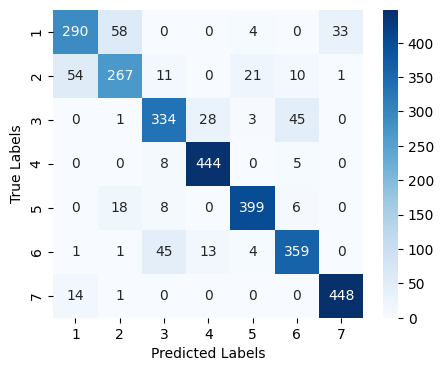

Confusion Matrix of KNeighbors Classifier


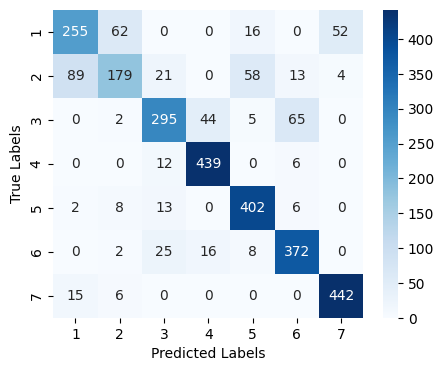

Confusion Matrix of Decision Tree Classifier


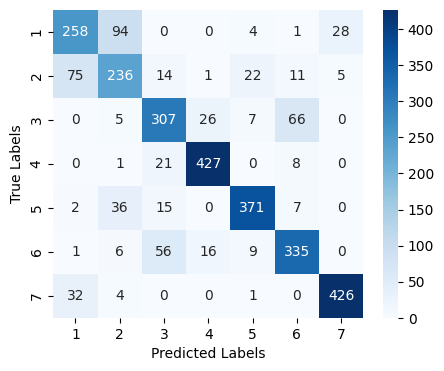

Confusion Matrix of Gradient Boosting Classifier


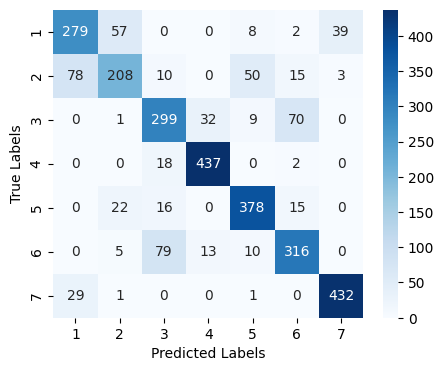

Confusion Matrix of Bernoulli NB


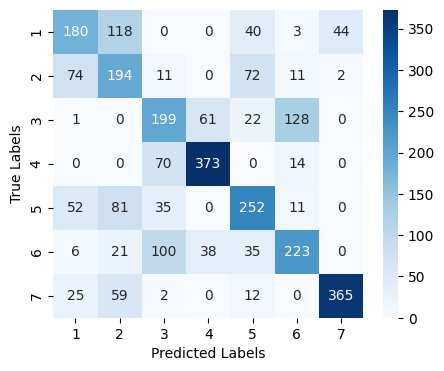

Confusion Matrix of Gaussian NB


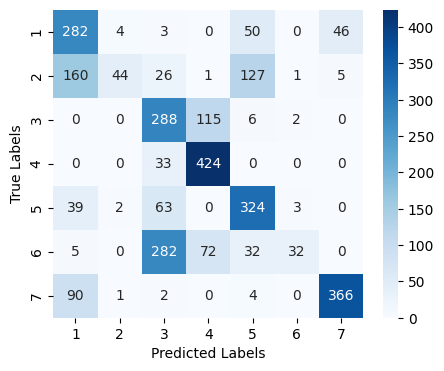

Confusion Matrix of Logistic Regression


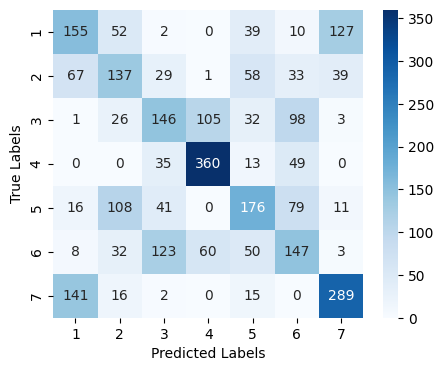

Classification Report of Random Forest Classifier:
              precision    recall  f1-score   support

           1       0.81      0.75      0.78       385
           2       0.77      0.73      0.75       364
           3       0.82      0.81      0.82       411
           4       0.92      0.97      0.94       457
           5       0.93      0.93      0.93       431
           6       0.84      0.85      0.85       423
           7       0.93      0.97      0.95       463

    accuracy                           0.87      2934
   macro avg       0.86      0.86      0.86      2934
weighted avg       0.86      0.87      0.86      2934

Classification Report of KNeighbors Classifier:
              precision    recall  f1-score   support

           1       0.71      0.66      0.68       385
           2       0.69      0.49      0.57       364
           3       0.81      0.72      0.76       411
           4       0.88      0.96      0.92       457
           5       0.82      0.93

Accuracy Score
Random Forest Classifier            0.866053
KNeighbors Classifier               0.812543
Decision Tree Classifier            0.804363
Gradient Boosting Classifier        0.800613
Bernoulli NB                        0.608725
Gaussian NB                         0.599864
Logistic Regression                 0.480573

In [223]:
classification_algo(x,y,confusion_mtr=True,classification_rpt=True)

## Testing the Conversational Model 

In [208]:
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.2, random_state=42)
rf = RandomForestClassifier()
model1=rf.fit(x_train, y_train)

In [209]:
df_test=pd.read_csv('/kaggle/input/forest-cover-type-prediction/test.csv')

In [210]:
df_submission=pd.read_csv('/kaggle/input/forest-cover-type-prediction/sampleSubmission.csv')

In [211]:
submission=pd.DataFrame({
    'Id':df_test['Id']}
)

In [212]:
df_test.drop('Id',axis=1,inplace=True)

In [213]:
predictions=model1.predict(df_test)

In [214]:
submission['Cover_Type']=predictions


In [215]:
submission.to_csv("submission1.csv", index=False)

## Modelling with Deep Learning

In [71]:
x=df.drop(['Cover_Type','Id'],axis=1)
y=df[['Cover_Type']]

In [72]:
label_encoder = LabelEncoder()
y = label_encoder.fit_transform(y['Cover_Type'])

In [73]:
x_train , x_test, y_train, y_test =train_test_split(x,y,test_size=.2,random_state=42)

In [74]:
model2=Sequential()
model2.add(Dense(8, activation='relu'))
model2.add(Dense(32,activation='relu')) 
model2.add(Dense(64,activation='relu')) 
model2.add(Dense(128,activation='relu'))
model2.add(Dense(64,activation='relu'))
model2.add(Dense(32,activation='relu'))
model2.add(Dense(7,activation='softmax'))
model2.compile(loss='sparse_categorical_crossentropy',optimizer='adam',metrics=['accuracy'])

In [75]:
x_train.shape,y_train.shape

((12096, 54), (12096,))

In [76]:
history=model2.fit(x_train,y_train,epochs=200,validation_split=.20,verbose=0)

In [77]:
predictions=model2.predict(x_test)
predictions_labels = np.argmax(predictions, axis=1)
accuracy_score(predictions_labels,y_test)

95/95 ━━━━━━━━━━━━━━━━━━━━ 1s 4ms/step


0.6805555555555556

## Testing the Deep Learning Model

In [78]:
df_test=pd.read_csv('/kaggle/input/forest-cover-type-prediction/test.csv')

In [79]:
df_test.head()

Id  Elevation  Aspect  Slope  Horizontal_Distance_To_Hydrology  \
0  15121       2680     354     14                                 0   
1  15122       2683       0     13                                 0   
2  15123       2713      16     15                                 0   
3  15124       2709      24     17                                 0   
4  15125       2706      29     19                                 0   

   Vertical_Distance_To_Hydrology  Horizontal_Distance_To_Roadways  \
0                               0                             2684   
1                               0                             2654   
2                               0                             2980   
3                               0                             2950   
4                               0                             2920   

   Hillshade_9am  Hillshade_Noon  Hillshade_3pm  \
0            196             214            156   
1            201             216            152   
2            206             208            137   
3            208             201            125   
4            210             195            115   

   Horizontal_Distance_To_Fire_Points  Wilderness_Area1  Wilderness_Area2  \
0                                6645                 1                 0   
1                                6675                 1                 0   
2                                6344                 1                 0   
3                                6374                 1                 0   
4                                6404                 1                 0   

   Wilderness_Area3  Wilderness_Area4  Soil_Type1  Soil_Type2  Soil_Type3  \
0                 0                 0           0           0           0   
1                 0                 0           0           0           0   
2                 0                 0           0           0           0   
3                 0                 0           0           0           0   
4                 0                 0           0           0           0   

   Soil_Type4  Soil_Type5  Soil_Type6  Soil_Type7  Soil_Type8  Soil_Type9  \
0           0           0           0           0           0           0   
1           0           0           0           0           0           0   
2           0           0           0           0           0           0   
3           0           0           0           0           0           0   
4           0           0           0           0           0           0   

   Soil_Type10  Soil_Type11  Soil_Type12  Soil_Type13  Soil_Type14  \
0            0            0            0            0            0   
1            0            0            0            0            0   
2            0            0            0            0            0   
3            0            0            0            0            0   
4            0            0            0            0            0   

   Soil_Type15  Soil_Type16  Soil_Type17  Soil_Type18  Soil_Type19  \
0            0            0            0            0            0   
1            0            0            0            0            0   
2            0            0            0            0            0   
3            0            0            0            0            0   
4            0            0            0            0            0   

   Soil_Type20  Soil_Type21  Soil_Type22  Soil_Type23  Soil_Type24  \
0            0            0            0            0            0   
1            0            0            0            0            0   
2            0            0            0            0            0   
3            0            0            0            0            0   
4            0            0            0            0            0   

   Soil_Type25  Soil_Type26  Soil_Type27  Soil_Type28  Soil_Type29  \
0            0            0            0            0            1   
1            0            0            0            0

In [80]:
submission2=pd.DataFrame({
    'Id':df_test['Id']})

In [81]:
df_test.drop('Id',axis=1,inplace=True)

In [82]:
df_submission=pd.read_csv('/kaggle/input/forest-cover-type-prediction/sampleSubmission.csv')

In [83]:
predictions=model2.predict(df_test)
predictions_labels = np.argmax(predictions, axis=1)

17685/17685 ━━━━━━━━━━━━━━━━━━━━ 21s 1ms/step


In [84]:
predictions_labels

array([1, 1, 4, ..., 5, 5, 5])

In [85]:
submission2['Cover_Type']=predictions_labels

In [90]:
submission2['Cover_Type']+=1

In [91]:
submission2.to_csv("submission2.csv", index=False)

In [92]:
submission2.head()

Id  Cover_Type
0  15121           2
1  15122           2
2  15123           5
3  15124           5
4  15125           5

## 🏁 Conclusion

In this study, we explored various **machine learning** and **deep learning** models to predict **forest cover types** based on geographical and environmental features.

### 🔍 **Model Performance Summary**
| Model | Accuracy Score |
|--------|---------------|
| 🌳 **Random Forest Classifier** | **0.8661** |
| 📌 **K-Neighbors Classifier** | 0.8125 |
| 🌲 **Decision Tree Classifier** | 0.8044 |
| 🚀 **Gradient Boosting Classifier** | 0.8006 |
| 🧪 **Bernoulli Naïve Bayes** | 0.6087 |
| 🔬 **Gaussian Naïve Bayes** | 0.5999 |
| 📉 **Logistic Regression** | 0.4806 |
| 🤖 **Deep Learning Model** | 0.6806 |

Among all models, **Random Forest Classifier** achieved the highest accuracy (**86.61%**), followed by **K-Nearest Neighbors** (81.25%) and **Decision Tree** (80.44%).  
Deep learning, while promising, underperformed compared to traditional ML methods, achieving **68.06% accuracy**.

### 📊 **Random Forest Classification Report**
- **Class 1-3:** Moderate performance, with **F1-scores around 75-82%**.
- **Class 4, 5, 7:** **High accuracy (~93-97%)**, indicating well-defined patterns in these classes.
- **Class 6:** Slightly lower F1-score (85%) but still reliable.

### 🚀 **Key Insights**
✔️ **Random Forest outperforms other classifiers** due to its robustness against noise and overfitting.  
✔️ **Deep Learning requires further tuning** (e.g., more layers, hyperparameter tuning) to achieve better results.  
✔️ **Feature importance analysis** could help refine model performance.  

### 🔮 **Future Improvements**
📌 **Hyperparameter tuning** for deep learning models to boost performance.  
📌 **Feature selection & engineering** to improve ML model generalization.  
📌 **Ensemble methods** (Stacking, Bagging) to combine the strengths of multiple models.  

In conclusion, **Random Forest Classifier** is the most effective model for this dataset, while deep learning needs further optimization to match its performance.  